In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import kneighbors_graph
from tqdm import tqdm
from scipy.spatial import distance


In [2]:
import scanpy as sc


In [3]:
path = "../data/raw/visium/"
visium = sc.read_visium(path, genome=None, count_file='CytAssist_FFPE_Human_Breast_Cancer_filtered_feature_bc_matrix.h5',
                        library_id=None, load_images=True, source_image_path=None)
visium.var_names_make_unique()

/home/o313a/miniconda3/envs/torch_geo/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
coor_int = [[int(x[0]),int(x[1])] for x in visium.obsm["spatial"]]
visium.obsm["spatial"] = np.array(coor_int)

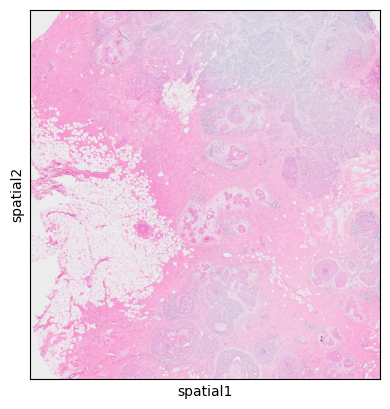

In [6]:
    sc.pl.spatial(visium
                 )

In [20]:
visium.obs["spot_id"] = [str(x) for x in range(visium.shape[0])]

In [30]:
visium.obs.set_index("spot_id", inplace=True)

In [10]:
path = "../data/external/visium_annotated_cell2location.h5ad"
mapped = sc.read_h5ad(path)
mapped.var_names_make_unique()

/home/o313a/miniconda3/envs/torch_geo/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [22]:
mapped_data = mapped.obs

In [24]:
mapped_data.columns

Index(['in_tissue', 'array_row', 'array_col', 'spot_id', 'dataset', 'ROI',
       'n_counts', '_indices', '_scvi_batch', '_scvi_labels', 'B-cells',
       'CAFs', 'Cancer Epithelial', 'Endothelial', 'Myeloid',
       'Normal Epithelial', 'PVL', 'Plasmablasts', 'T-cells'],
      dtype='object')

In [26]:
cts = ['B-cells',
       'CAFs', 'Cancer Epithelial', 'Endothelial', 'Myeloid',
       'Normal Epithelial', 'PVL', 'Plasmablasts', 'T-cells']

In [28]:
rep1_ct = pd.DataFrame(mapped.obsm["xe_rep1_celltype_major"],columns = cts, index = mapped.obs.index)

In [29]:
rep2_ct = pd.DataFrame(mapped.obsm["xe_rep2_celltype_major"],columns = cts, index = mapped.obs.index)

In [33]:
visium_rep1 = visium.copy()
visium_rep1.obs = visium_rep1.obs.join(rep1_ct)

In [36]:
visium_rep1 = visium_rep1[visium_rep1.obs[~visium_rep1.obs.CAFs.isna()].index]

In [38]:
import matplotlib as mpl


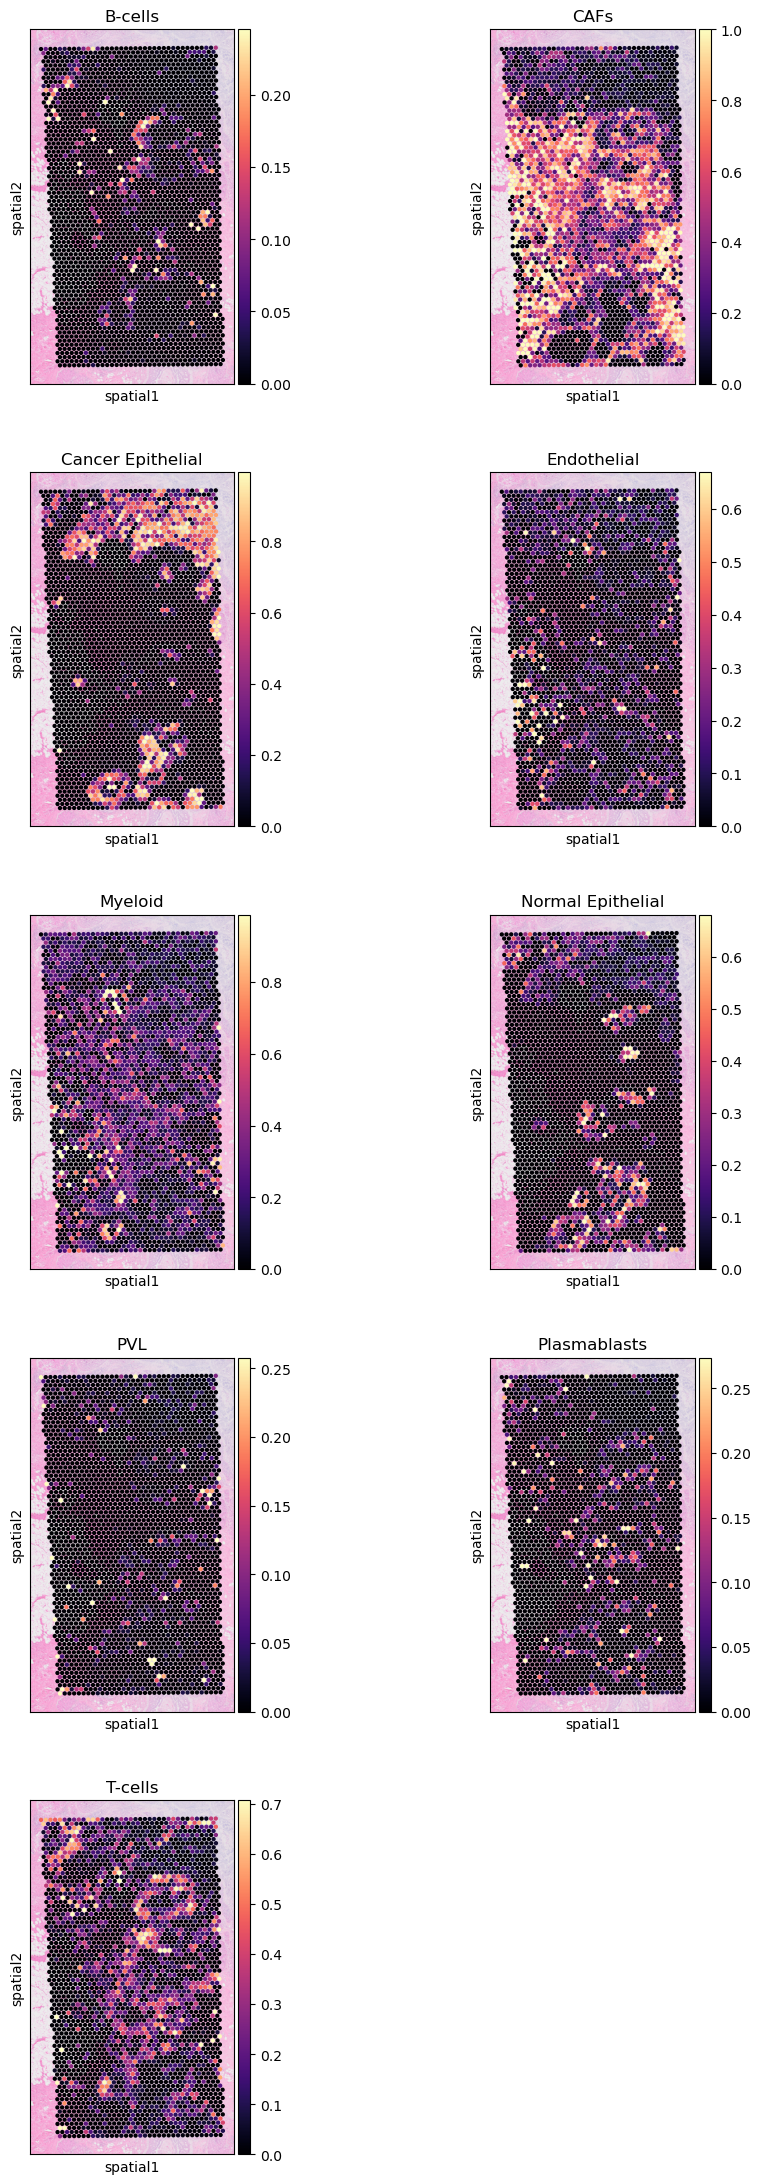

In [39]:
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(visium_rep1, cmap='magma',
                  # show first 8 cell types
                  color=cts,
                  ncols=2, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2',
                  show=False
                 )

In [40]:
visium_rep2 = visium.copy()
visium_rep2.obs = visium_rep2.obs.join(rep2_ct)

In [41]:
visium_rep2 = visium_rep2[visium_rep2.obs[~visium_rep2.obs.CAFs.isna()].index]

In [42]:
import matplotlib as mpl


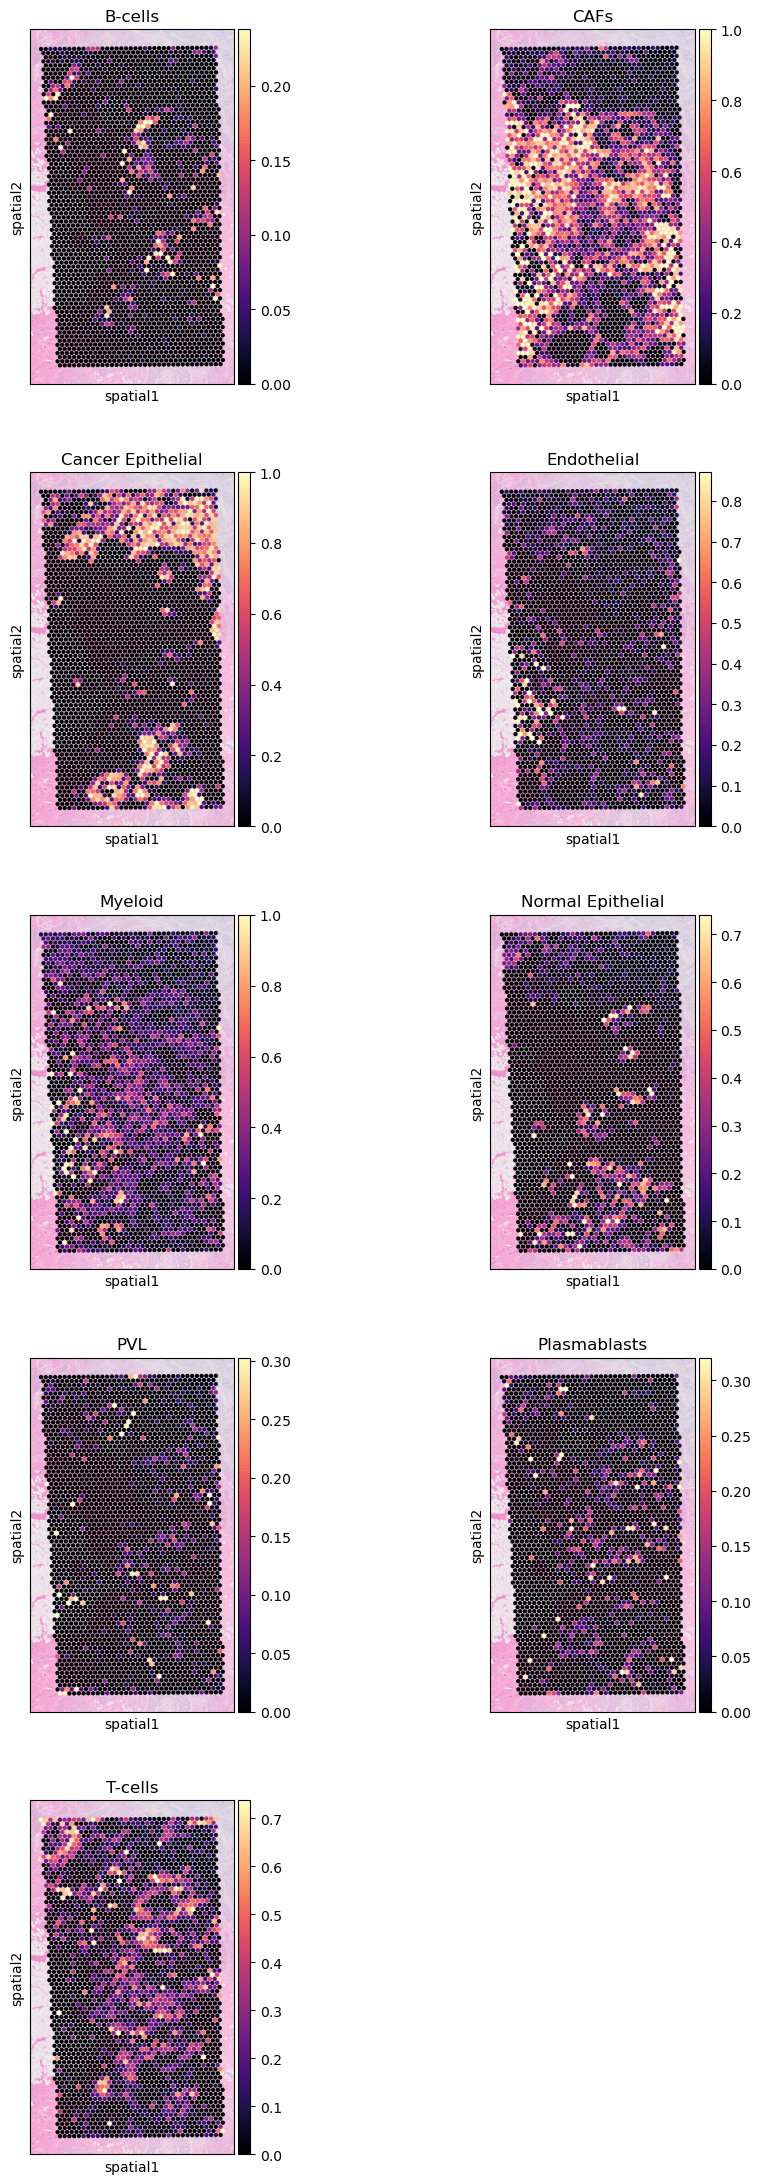

In [43]:
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(visium_rep2, cmap='magma',
                  # show first 8 cell types
                  color=cts,
                  ncols=2, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2',
                  show=False
                 )

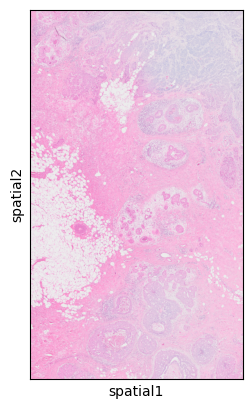

In [48]:
    sc.pl.spatial(visium_rep2
                 )

In [44]:
visium_rep2.obs["cell_type"] = visium_rep2.obs[cts].idxmax(axis = 1)

/tmp/ipykernel_87092/4271328066.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  visium_rep2.obs["cell_type"] = visium_rep2.obs[cts].idxmax(axis = 1)


In [46]:
visium_rep2.uns["cell_type_colors"] = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf']

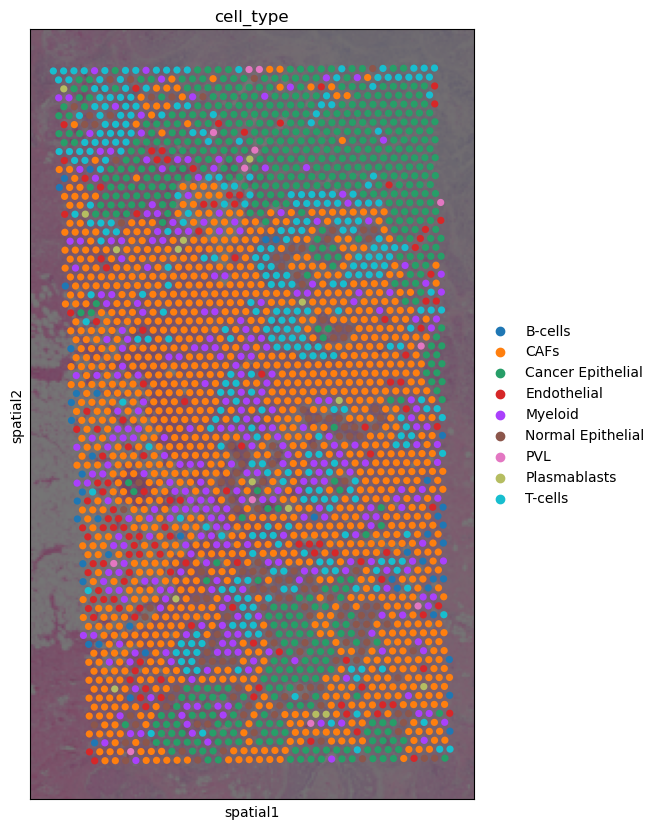

In [47]:
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [10, 10]}):
    sc.pl.spatial(visium_rep2, cmap='magma',
                  # show first 8 cell types
                  color="cell_type",
                img_key='lowres', alpha_img = 0.5,
                 )

In [50]:
mapped_data

in_tissue  array_row  array_col  spot_id dataset ROI  n_counts  \
spot_id                                                                   
2              1.0       47.0       71.0        2  visium  NA    1231.0   
4              1.0       49.0       43.0        4  visium  NA     285.0   
6              1.0       28.0       86.0        6  visium  NA     949.0   
7              1.0       51.0       41.0        7  visium  NA     923.0   
15             1.0       67.0       55.0       15  visium  NA    2654.0   
...            ...        ...        ...      ...     ...  ..       ...   
4986           1.0       35.0       35.0     4986  visium  NA     339.0   
4987           1.0       28.0       72.0     4987  visium  NA     479.0   
4988           1.0        1.0       95.0     4988  visium  NA    1240.0   
4989           1.0       13.0       53.0     4989  visium  NA    1753.0   
4990           1.0       49.0       47.0     4990  visium  NA     276.0   

         _indices  _scvi_batch  _scvi_labels   B-cells      CAFs  \
spot_id                                                            
2               0            0             0  0.011746  0.177477   
4               1            0             0  0.002942  0.376152   
6               2            0             0  0.055420  0.234390   
7               3            0             0  0.001698  0.038591   
15              4            0             0  0.001679  0.010104   
...           ...          ...           ...       ...       ...   
4986         2824            0             0  0.002988  0.421652   
4987         2825            0             0  0.001810  0.291808   
4988         2826            0             0  0.084667  0.193466   
4989         2827            0             0  0.008341  0.034044   
4990         2828            0             0  0.007821  0.286549   

         Cancer Epithelial  Endothelial   Myeloid  Normal Epithelial  \
spot_id                                                                
2                 1.909318     0.167446  0.318918           0.531627   
4                 0.248683     0.016770  0.013949           0.001495   
6                 0.000113     0.000965  0.054476           0.000061   
7                 4.396766     0.008081  0.003694           0.057180   
15               25.823716     0.015001  0.012353           1.002385   
...                    ...          ...       ...                ...   
4986              0.222092     0.006346  0.006727           0.001228   
4987              0.000330     0.096834  0.009522           0.000067   
4988              0.128583     0.137704  0.500076           0.011021   
4989              6.675216     0.040186  0.235456           0.159199   
4990              0.007444     0.003011  0.106723           0.001098   

              PVL  Plasmablasts   T-cells  
spot_id                                    
2        0.115994      0.013231  0.150769  
4        0.008035      0.001880  0.005585  
6        0.003554      0.118016  0.074942  
7        0.001228      0.002170  0.004821  
15       0.008256      0.007151  0.007079  
...           ...           ...       ...  
4986     0.017151      0.017418  0.021925  
4987     0.001241      0.001927  0.008583  
4988     0.020090      0.054479  1.090027  
4989     0.014441      0.009573  0.166024  
4990     0.005782      0.021639  0.375829  

[2829 rows x 19 columns]

In [52]:
visium_c2l = visium.copy()
visium_c2l.obs = visium_c2l.obs.join(mapped_data[cts])

In [53]:
visium_c2l = visium_c2l[visium_c2l.obs[~visium_c2l.obs.CAFs.isna()].index]

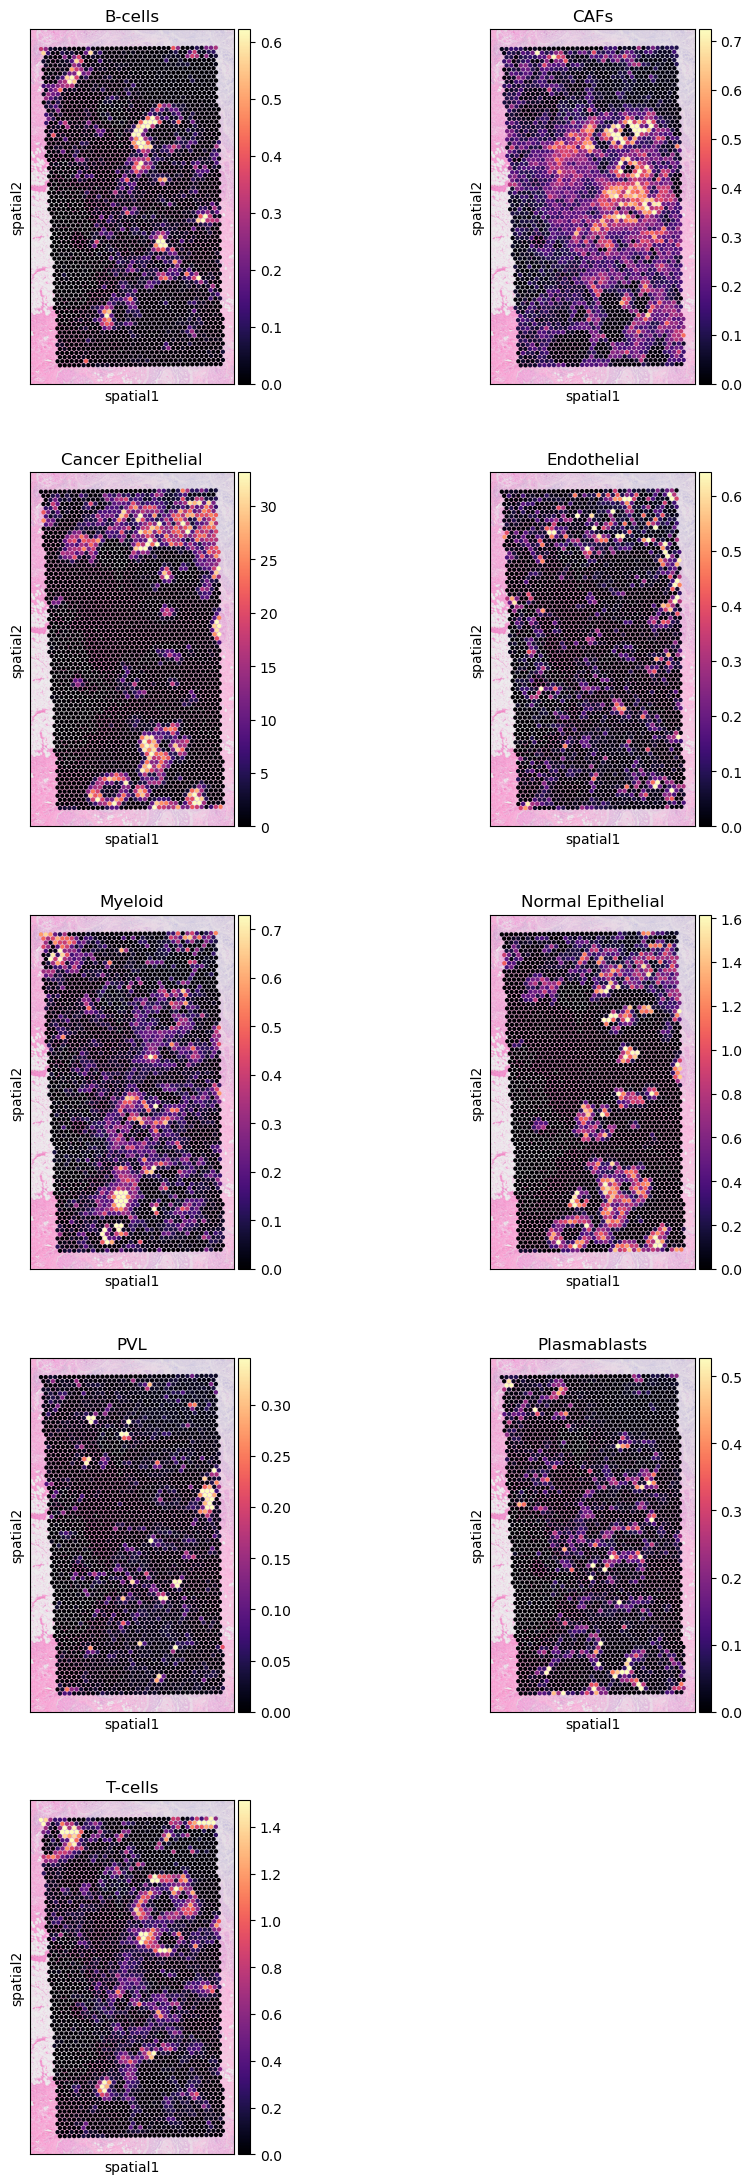

In [54]:
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(visium_c2l, cmap='magma',
                  # show first 8 cell types
                  color=cts,
                  ncols=2, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.2',
                  show=False
                 )

In [55]:
visium_c2l.obs["cell_type"] = visium_c2l.obs[cts].idxmax(axis = 1)

/tmp/ipykernel_87092/1600023575.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  visium_c2l.obs["cell_type"] = visium_c2l.obs[cts].idxmax(axis = 1)


In [57]:
visium_c2l.uns["cell_type_colors"] = ['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf']

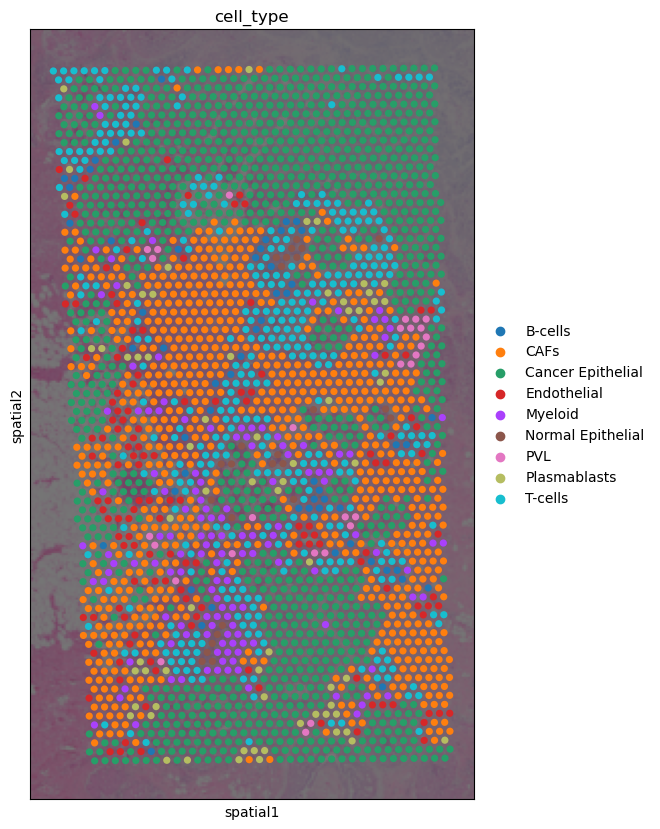

In [58]:
with mpl.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [10, 10]}):
    sc.pl.spatial(visium_c2l, cmap='magma',
                  # show first 8 cell types
                  color="cell_type",
                img_key='lowres', alpha_img = 0.5,
                 )